<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Day1_Task_handout_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python functions, objects and classes

## Task 1
Please use the function defined below to print out the text "Hello my friend"!

In [3]:
#define a function named hello, that accepts a named parameter "who" and prints 
#out "Hello" and the incoming string concateneted

def hello(who):
    print("hello "+who)



In [2]:
hello("my friend")

hellomy friend


## Task 2

In [5]:
class AbstractShape:
    """A class representing planar figures.
    """
    
    def __init__(self, centerx, centery, color="black"):
        """Initialize a shape.
        
        Args:
            centerx: The x coordinate of the shape's center.
            centery: The y coordinate of the shape's center.
            color (str): The shape's color.
        """
        self.centerx = centerx
        self.centery = centery
        self.color = color
        
    def move_by(self, dx, dy):
        """Move the shape by the given distances.
        
        Args:
            dx: Movement along the x axis.
            dy: Movement along the y axis.
            
        Returns:
            None
        """
        self.centerx += dx
        self.centery += dy
        
    def area(self):
        """Return the area of the shape
        """
        
        raise NotImplementedError # Raise an exception if a class simply inherits without implementing

In [45]:
# Define a Circle class that inherits form AbstractShape
# Accepts more parameters for radius
# implement the "area" function, that calculates the area of the circle
# use the math library imported blow

from math import pi # We will need pi for calculating the area

class Circle(AbstractShape):
    """A class representing a circle.    
    """
    
    def __init__(self, centerx, centery, radius, color="black"):
                 # You have to correct the init here!
        self.centerx = centerx
        self.centery = centery
        self.color = color
        self.radius=radius
        self.areat=self.radius**2*pi/4
                 
                 
                 
    #The function area needs to be implemented here
                 
    
    # This is an additional property of the class, illustrating the usage of decorators in Python
    # https://realpython.com/primer-on-python-decorators/
    # Property is a special type of decorator
    # https://www.programiz.com/python-programming/property
    @property  # ENNEK UTÁNA NÉZNI !!!!
    def diameter(self):
        """Return the circle's diameter.
        """
        return 2 * self.radius
        self.area()
                 
    #Setter is another tpye of reserved property
    # https://www.python-course.eu/python3_properties.php
    @diameter.setter
    def diameter(self, diameter):
        """Set the diameter to the givem size.
        """
        self.radius = diameter / 2
        self.area()
    
    #Repr is a default function that implements the pronted representation of the class
    def __repr__(self):
        """Return the string representation of the circle.
        """
        return f"Circle({self.centerx}, {self.centery}, {self.radius}, '{self.color}')"
    def area(self):
        self.areat=self.radius**2*pi/4
        return(self.areat)

In [39]:
# ok, we also need the square root function, import it here please 
from math import sqrt

# Implement the rectangle class, which acts as name implies
# it has an area function as well, but naturally for a rectangle
# it has widht and heights parameters in _init_, as well as the defualt ones
class Rectangle(AbstractShape):
    """A class representing a rectangle.
    
    The sides are assumed to be parallel with the X and Y axis.
    """
    
    def __init__(self, centerx, centery, width,height, color="black"):
                 #Implement the __init__ here
        self.centerx = centerx
        self.centery = centery
        self.width=width
        self.height=height
        self.color=color
        self.diagonal=sqrt(self.width**2 + self.height**2)

    def area(self):
        return self.width * self.height
    
    
    #implement the diagonal property of the class here
    def diagonal(self):
        
        return self.diagonal
    
    
    def __repr__(self):
        """Return the string representation of the rectangle.
        """
        # Implement a nice printout here
        return f"Rechtangle({self.centerx}, {self.centery}, {self.width},{self.height},Area:{self.area()} Color:'{self.color}')"

In [40]:
r = Rectangle(0, 0, 4, 3)
r

Rechtangle(0, 0, 4,3,Area:12 Color:'black')

In [41]:
r.diagonal

5.0

In [46]:
r.area()

12

In [47]:
r.move_by(1,1)
r

Rechtangle(2, 2, 4,3,Area:12 Color:'black')

In [48]:
c = Circle(0,0,3, "red")
print(c)
c.area()

Circle(0, 0, 3, 'red')


7.0685834705770345

In [49]:
c.diameter = 20
c

Circle(0, 0, 10.0, 'red')

# Pandas basics

## Reading the data

The dataset we will be using contains data about [Abalone shells](https://en.wikipedia.org/wiki/Abalone). (With some noise graciously added by us :-P

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Haliotis_clathrata_01.JPG/367px-Haliotis_clathrata_01.JPG">


In [300]:
!wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/abalone.csv?inline=false -O abalone.csv

--2020-10-22 21:45:31--  https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/abalone.csv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘abalone.csv’

abalone.csv             [  <=>               ] 195.60K   614KB/s    in 0.3s    

2020-10-22 21:45:32 (614 KB/s) - ‘abalone.csv’ saved [200291]




The data is in the file "abalone.csv".

**General info**

>Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.
   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).


**Field info**

>Sex / nominal / -- / M, F, and I (infant)

> Length / continuous / mm / Longest shell measurement

> Diameter / continuous / mm / perpendicular to length

> Height / continuous / mm / with meat in shell
> Whole weight / continuous / grams / whole abalone

> Shucked weight / continuous / grams / weight of meat

> Viscera weight / continuous / grams / gut weight

> Shell weight / continuous / grams / after being dried

> Rings / integer / -- / +1.5 gives the age in years 

In [ ]:
!ls

abalone.csv  sample_data


In [370]:
import pandas as pd

# implement the "abalone.csv" file using Pandas's read_csv function
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# bear in mind, the the format of the csv _can be different_ from default
# when in doubt, you can use the head shell command with the ! syntax
# https://ss64.com/bash/head.html
# Or the Colab file viewer

df =pd.read_csv("abalone.csv",";")

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,"0,455","0,365","0,095","0,514","0,2245","0,101","0,15","15,0"
1,M,"0,35","0,265","0,09","0,2255","0,0995","0,0485","0,07","7,0"
2,F,"0,53","0,42","0,135","0,677","0,2565","0,1415","0,21","9,0"
3,M,"0,44","0,365",NaN,"0,516","0,2155","0,114","0,155","10,0"
4,I,"0,33","0,255","0,08","0,205","0,0895","0,0395","0,055","7,0"


In [371]:
# We assert the fact that the shape of the DataFrame is appropriate
# If this expression evalueates to false, it throws an exception
assert df.shape==(4177, 9)

df.shape

(4177, 9)

## Fixing the column names

Fix the column names to be able to use "dot syntax" for columns.

In [372]:
def normalize_columnname2(h):
    """Normalize a column name by downcasing and replacing spaces with '_'.
    """
   # Implement the column name normalizer
   # use the default Python string functions
   # https://docs.python.org/2/library/string.html

    norm=[]
    b=""
    print("h=",h)
    for a in h:
        print("a=",a)
       
        
        b=a.lower()
        b=b.replace(" ","_")
        print("b=",b)
        norm.append(b)
    #print(norm)
    return(norm)
    
def normalize_columnname(h):
    """Normalize a column name by downcasing and replacing spaces with '_'.
    """
   # Implement the column name normalizer
   # use the default Python string functions
   # https://docs.python.org/2/library/string.html

    
       
        
    h=h.lower()
    h=h.replace(" ","_")
    
    return(h)
    
        


a=[z for z in df.columns]
print("columns:",a)
print(normalize_columnname2(a))
df.rename(columns=normalize_columnname, inplace=True)
#df.rename(columns=str.lower(), inplace=True)
df.head()

columns: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
h= ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
a= Sex
b= sex
a= Length
b= length
a= Diameter
b= diameter
a= Height
b= height
a= Whole weight
b= whole_weight
a= Shucked weight
b= shucked_weight
a= Viscera weight
b= viscera_weight
a= Shell weight
b= shell_weight
a= Rings
b= rings
['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,"0,455","0,365","0,095","0,514","0,2245","0,101","0,15","15,0"
1,M,"0,35","0,265","0,09","0,2255","0,0995","0,0485","0,07","7,0"
2,F,"0,53","0,42","0,135","0,677","0,2565","0,1415","0,21","9,0"
3,M,"0,44","0,365",NaN,"0,516","0,2155","0,114","0,155","10,0"
4,I,"0,33","0,255","0,08","0,205","0,0895","0,0395","0,055","7,0"


In [373]:
df.whole_weight.head()

0     0,514
1    0,2255
2     0,677
3     0,516
4     0,205
Name: whole_weight, dtype: object

## Check and handle missing data

Check whether there are missing data.

In [374]:
# look for missing values in the df
# use the isnull() function, and some counting method of Pandas df
df.isnull()
df=df.dropna()
df.shape

(4171, 9)

Drop rows with NaN values.

In [375]:
df.shape==(4177,9)

# Drop the rows with missing values from the df
# bear in mind the rerutn value syntax vs the parameter for executing the operation on the df itslef


# this is just additional "tidying"
df.reset_index(inplace=True, drop=True) # Reset index since dropped rows create "wholes"


df.shape

(4171, 9)

## Convert floats to int

In [376]:
#convert the float value of the "rings" coluimn to an integer, since who saw any partial rings anyway? :-)
# pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),
import numpy as np
#pd['rings'] = pd['rings'].astype(string)   
#df.rings.replace(to_replace="9,0",value="9.0",inplace=True)
df.rings=df.rings.str.replace(",",".")
df.rings.convert_dtypes(convert_integer=True)
df.rings=pd.to_numeric(df.rings,downcast="integer")
df.height=df.height.str.replace(",",".")
df.height.convert_dtypes(convert_integer=True)
df.height=pd.to_numeric(df.height,downcast="float")
df.length=df.length.str.replace(",",".")
df.length.convert_dtypes(convert_integer=True)
df.length=pd.to_numeric(df.length,downcast="float")

df.whole_weight=df.whole_weight.str.replace(",",".")
df.whole_weight.convert_dtypes(convert_integer=True)
df.whole_weight=pd.to_numeric(df.whole_weight,downcast="float")

df.shell_weight=df.shell_weight.str.replace(",",".")
df.shell_weight.convert_dtypes(convert_integer=True)
df.shell_weight=pd.to_numeric(df.shell_weight,downcast="float")


df.diameter=df.diameter.str.replace(",",".")
df.diameter.convert_dtypes(convert_integer=True)
df.diameter=pd.to_numeric(df.diameter,downcast="float")

df.shucked_weight=df.shucked_weight.str.replace(",",".")
df.shucked_weight.convert_dtypes(convert_integer=True)
df.shucked_weight=pd.to_numeric(df.shucked_weight,downcast="float")

df.viscera_weight=df.viscera_weight.str.replace(",",".")
df.viscera_weight.convert_dtypes(convert_integer=True)
df.viscera_weight=pd.to_numeric(df.viscera_weight,downcast="float")

df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Descriptives

In [377]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,0.523969,0.407850,0.139507,0.828558,0.359304,0.180551,0.238778,9.931671
std,0.120120,0.099259,0.041841,0.490343,0.221960,0.109596,0.139176,3.222579
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441250,0.186000,0.093250,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501750,0.252750,0.328750,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [378]:
# Describe the "sex" column and look at the values
df.sex.describe()

count     4171
unique       3
top          M
freq      1526
Name: sex, dtype: object

Find the index of the examples with the maximal and minimal values.

In [379]:
# find the rows indeces with the largest values in them, from the "height" parameter onwards till the end
# bear in mind that multiple versions of "max" exist in Pandas
# and getting the location can be done also in multiple ways
print(df.height.max())
df.height.idxmax()


1.1299999952316284


2045

In [380]:
df.loc[2045]

sex                    F
length             0.455
diameter           0.355
height              1.13
whole_weight       0.594
shucked_weight     0.332
viscera_weight     0.116
shell_weight      0.1335
rings                  8
Name: 2045, dtype: object

## Standardization

In [381]:
# we create a new df for the numeric values that we think need normalization 
df_numeric = df.loc[:,"length":"shell_weight"]
df_numeric.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [382]:
# Calculate the mean of the df_numeric in one go
# If done right, this will be a Pandas.Series obejct (a kind of vector) of means
mean = df_numeric.mean()

# Calculate the standard deviation of the df_numeric in one go
# If done right, this will be a Pandas.Series obejct (a kind of vector) of means
std = df_numeric.std()

# Now we apply the two Series calculated for normalization in one go for the whole df 
df_numeric_std = (df_numeric - mean) / std
df_numeric_std.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,-0.574166,-0.431705,-1.063719,-0.641505,-0.607335,-0.725853,-0.637880
1,-1.448293,-1.439174,-1.183219,-1.229869,-1.170499,-1.204886,-1.212693
2,0.050209,0.122403,-0.107724,-0.309085,-0.463164,-0.356314,-0.206771
3,-1.614793,-1.539921,-1.422217,-1.271677,-1.215552,-1.287006,-1.320470
4,-0.823917,-1.086560,-1.063719,-0.972906,-0.983528,-0.940278,-0.853435


In [383]:
df_numeric_std.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4171.000000,4171.000000,4.171000e+03,4171.000000,4.171000e+03,4171.000000,4.171000e+03
mean,0.000002,0.000002,8.859957e-08,-0.000002,-5.645222e-07,0.000002,9.966023e-08
std,1.000001,1.000004,9.999962e-01,0.999998,9.999987e-01,1.000000,9.999999e-01
min,-3.737673,-3.554860,-3.334208e+00,-1.685673,-1.614273e+00,-1.642859,-1.704876e+00
25%,-0.615792,-0.582825,-5.857217e-01,-0.789871,-7.807893e-01,-0.796568,-7.815835e-01
50%,0.175085,0.172777,1.177528e-02,-0.059260,-1.049919e-01,-0.087143,-3.432713e-02
75%,0.757836,0.726885,6.092724e-01,0.661664,6.417641e-01,0.658779,6.464665e-01
max,2.422839,2.439583,2.367266e+01,4.072543,5.085132e+00,5.287147,5.505429e+00


In [384]:
df.loc[:,"length":"shell_weight"] = df_numeric_std
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,-0.574166,-0.431705,-1.063719,-0.641505,-0.607335,-0.725853,-0.637880,15
1,M,-1.448293,-1.439174,-1.183219,-1.229869,-1.170499,-1.204886,-1.212693,7
2,F,0.050209,0.122403,-0.107724,-0.309085,-0.463164,-0.356314,-0.206771,9
3,I,-1.614793,-1.539921,-1.422217,-1.271677,-1.215552,-1.287006,-1.320470,7
4,I,-0.823917,-1.086560,-1.063719,-0.972906,-0.983528,-0.940278,-0.853435,8


In [385]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4171.000000,4171.000000,4.171000e+03,4171.000000,4.171000e+03,4171.000000,4.171000e+03,4171.000000
mean,0.000002,0.000002,8.859957e-08,-0.000002,-5.645222e-07,0.000002,9.966023e-08,9.931671
std,1.000001,1.000004,9.999962e-01,0.999998,9.999987e-01,1.000000,9.999999e-01,3.222579
min,-3.737673,-3.554860,-3.334208e+00,-1.685673,-1.614273e+00,-1.642859,-1.704876e+00,1.000000
25%,-0.615792,-0.582825,-5.857217e-01,-0.789871,-7.807893e-01,-0.796568,-7.815835e-01,8.000000
50%,0.175085,0.172777,1.177528e-02,-0.059260,-1.049919e-01,-0.087143,-3.432713e-02,9.000000
75%,0.757836,0.726885,6.092724e-01,0.661664,6.417641e-01,0.658779,6.464665e-01,11.000000
max,2.422839,2.439583,2.367266e+01,4.072543,5.085132e+00,5.287147,5.505429e+00,29.000000


# Basic plotting

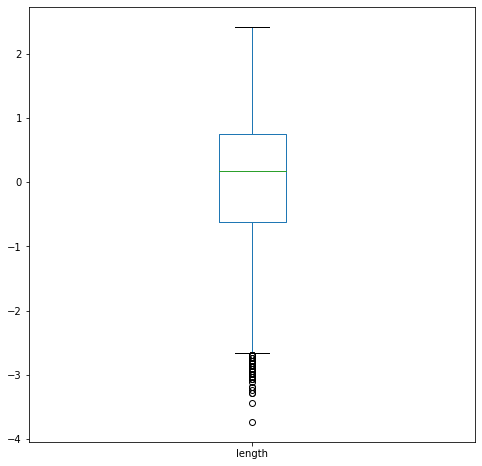

In [387]:
df.length.plot.box(figsize=(8,8)) # the semicolon is to stop Jupyter from "printing" the figure as well
# This is a verbose syntax, the alternative is also viable: df.length.boxplot() 

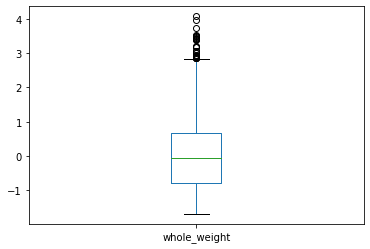

In [390]:
df.whole_weight.plot.box()


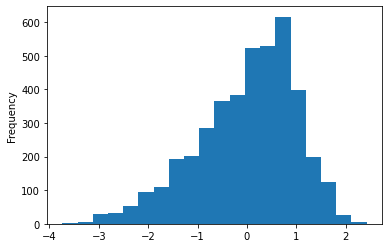

In [393]:
# Do a histogram with 20 bins for the "length" data
df.length.plot.hist(bins=20);

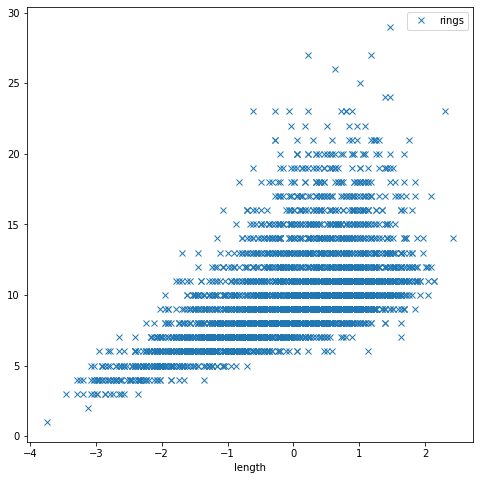

In [400]:
# implement a scatter plot between "length" and "rings", use figure size 8,8
df.plot(x='length', y='rings', style='x',figsize=(8,8));